# Stage 4b: The Sun (Coronagraph)

A very important part of our Solar System is the Sun itself. It is for this reason that we, as its residents, have many observatories, both ground and space-based, that take measurements related to it and its influence.



1.   Installing the relevant modules
2.   Fetching Images from current spacecraft
3.   Plotting them
4.   Making a video in Python (intro)

## Installing the relevant modules

The first step here will be to get a module installed inside the jupyter notebook. To do that, just **run the following line the first time you open this notebook:**

In [1]:
!pip install -q sunpy[all] astropy  # This package is used for all things Sun-related, hosted in github: https://github.com/sunpy/sunpy


**After the installation is finished, click on Runtime and Restart the Runtime with Control + M!**

In [2]:
from sunpy.net import Fido, attrs as a
from astropy import units as u  

from datetime import datetime   # Python's small Time module

Inst = 'LASCO'  
Detect = 'C3' # Here we will use the Atmospheric Imaging Assembly: aia
# It is onboard the Solar Dynamics Observatory. 
#Provides us with images of the Sun almost 24-7!


# Now choose the period we would like to get our data from. Please don't do too much at once!

start_time = datetime(2012,8,31,18,0)  # Year,Month,Day,Hour,Minute
end_time = datetime(2012,8,31,23,59)

samplerate_hours = 6 * u.minute  # We need to give our images a cadence for collection. 
# Please keep in mind that aia takes an image in all of its wavelengths every 10 seconds or so.
# Choose a cadence depending on what you want to bring out!

  
#fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a.vso.Sample(samplerate_hours))

fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a. Detector(Detect), a.Sample(samplerate_hours))

print(fido)

Results from 1 Provider:

30 Results from the VSOClient:
       Start Time               End Time        Source ... Extent Type   Size 
                                                       ...              Mibyte
----------------------- ----------------------- ------ ... ----------- -------
2012-08-31 18:06:06.000 2012-08-31 18:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:18:06.000 2012-08-31 18:18:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:30:05.000 2012-08-31 18:30:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:42:05.000 2012-08-31 18:42:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:54:05.000 2012-08-31 18:54:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:06:06.000 2012-08-31 19:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:18:05.000 2012-08-31 19:18:24.000   SOHO ...      CORONA 2.01074
2012-08-31 19:30:05.000 2012-08-31 19:30:24.000   SOHO ...      CORONA 2.01074
2012-08-31 19:42:06.000 2012-08-31 19:42:25.000   SOHO ...      CORONA 2.0

Now, we should have a series of results showing above this text-box. These are available records that we may now download:

In [3]:
from os import makedirs as newdir

dir_images = 'LASCO_data'
newdir(dir_images, exist_ok = True)

Fido.fetch(fido, path = 'LASCO_data/')

['LASCO_data/32310941.fts', 'LASCO_data/32310947.fts', 'LASCO_data/32310961.fts', 'LASCO_data/32310957.fts', 'LASCO_data/32310967.fts', 'LASCO_data/32310942.fts', 'LASCO_data/32310949.fts', 'LASCO_data/32310966.fts', 'LASCO_data/32310946.fts', 'LASCO_data/32310965.fts', 'LASCO_data/32310943.fts', 'LASCO_data/32310970.fts', 'LASCO_data/32310963.fts', 'LASCO_data/32310968.fts', 'LASCO_data/32310959.fts', 'LASCO_data/32310944.fts', 'LASCO_data/32310954.fts', 'LASCO_data/32310969.fts', 'LASCO_data/32310952.fts', 'LASCO_data/32310945.fts', 'LASCO_data/32310964.fts', 'LASCO_data/32310953.fts', 'LASCO_data/32310948.fts', 'LASCO_data/32310955.fts', 'LASCO_data/32310956.fts', 'LASCO_data/32310962.fts', 'LASCO_data/32310958.fts', 'LASCO_data/32310960.fts']
Errors:
(error(filepath_partial=functools.partial(<function VSOClient.mk_filename at 0x7f9b17fc58b0>, 'LASCO_data/{file}', <QueryResponseRow index=10>
       Start Time               End Time        Source Instrument Provider  Physobs  Extent 

##Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

 [astropy.io.fits.verify]
Changed DATE-OBS from '2012/08/31T18:06:06.298' to '2012-08-31T18:06:06.298''. [astropy.wcs.wcs]
/Users/atm2/opt/anaconda3/lib/python3.8/site-packages/sunpy/util/decorators.py:378: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.

  new_val = prop(instance)
/Users/atm2/opt/anaconda3/lib/python3.8/site-packages/sunpy/map/mapbase.py:914: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.

  rsun = sun._angular_radius(self.rsun_meters, self.dsun)


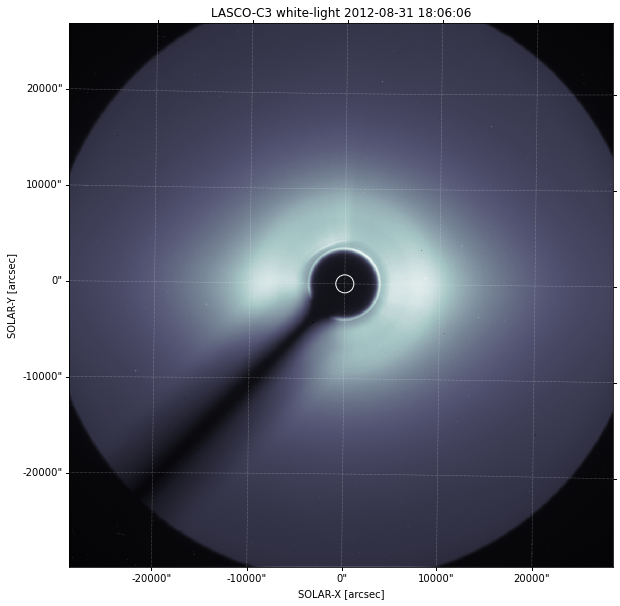

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sunpy.map
import glob  # To fetch all files from a directory

map_list = sorted(glob.glob('LASCO_data/*.fts'))

lasco_map = sunpy.map.Map(map_list[0])
    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=lasco_map)
lasco_map.plot(axes=ax, cmap = plt.get_cmap('soholasco3'))
lasco_map.draw_limb()
plt.show()

Observatory,SOHO
Instrument,LASCO
Detector,C3
Measurement,white-light
Wavelength,0.0
Observation Date,2012-08-31 18:06:06
Exposure Time,19.092800 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[56. 56.] arcsec / pix
Reference Pixel,[518.2 532.5] pix

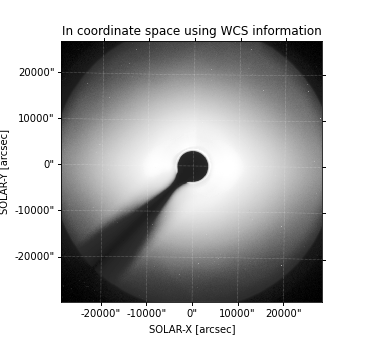
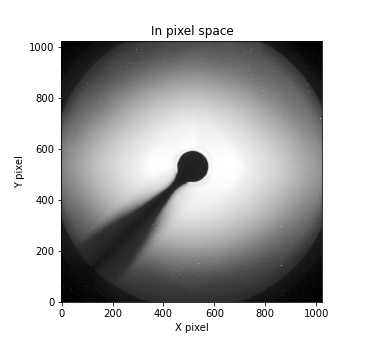
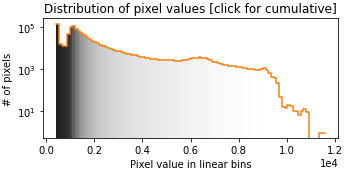
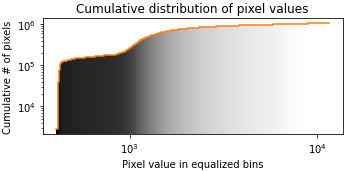

In [9]:
lasco_map #get the time of the map

As we have just seen, it is fairly straightforward to get images from a spacecraft into Python and show them, but what can we do once we have these images?

## Making videos out of our material

A first good use of these images is to study the dynamics of the solar atmosphere, known to affect spacecraft and the Earth's weather! To do that, we need to have a look at all of the images in rapid succession.

In [16]:
!pip install -q opencv-python

In [ ]:
import cv2  # Here, we import OpenCV, a powerful image and video processing tool
from os import getcwd
import glob
! git clone https://github.com/andyto1234/WEW_PythonWorkshop_Database.git

dir_png = 'WEW_PythonWorkshop_Database/LASCO_images'
img_array = []

for filename in sorted(glob.glob(f'{dir_png}/*.png')):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('solar_vid_coronograph.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


With the above, we will have created a movie called "solar_vid_coronograph.mp4", which holds all of our images together.